<a href="https://colab.research.google.com/github/manabtikadar/ReinforcementLearning/blob/main/Markov_Reward_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# initialise the MRP

S = ['c1','c2','c3', 'pass', 'pub', 'tv', 'sleep']
R = np.array([-2, -2, -2, 10, 1, -1, 0])
P = np.array([
    [0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.2],
    [0.0, 0.0, 0.0, 0.6, 0.4, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.2, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
    ])
gamma = 0.5

assert(np.all(np.sum(P,axis=1) == 1))

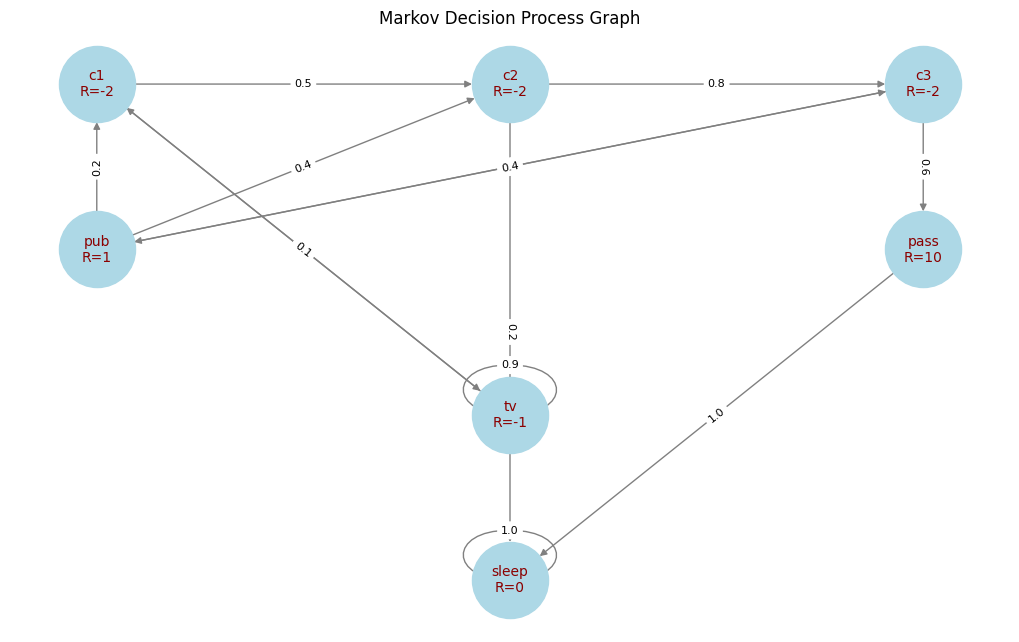

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes with rewards as labels
for i, state in enumerate(S):
    G.add_node(state, reward=R[i])

# Add edges with transition probabilities
for i in range(len(S)):
    for j in range(len(S)):
        if P[i, j] > 0:
            G.add_edge(S[i], S[j], weight=P[i, j])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = {
    'c1': (-1, 1), 'c2': (0, 1), 'c3': (1, 1),
    'pass': (1, 0), 'pub': (-1, 0), 'tv': (0, -1), 'sleep': (0, -2)
}
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)

# Draw edge labels (transition probabilities)
edge_labels = {(S[i], S[j]): f'{P[i, j]:.1f}' for i in range(len(S)) for j in range(len(S)) if P[i, j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Draw node labels (rewards)
reward_labels = {state: f'{state}\nR={R[i]}' for i, state in enumerate(S)}
nx.draw_networkx_labels(G, pos, labels=reward_labels, font_size=10, font_color='darkred')

plt.title("Markov Decision Process Graph")
plt.show()

In [ ]:
# sample an episode from a given state index
def sample_episode(P, s=0, log=True):
  print_str = str(S[s]) + ', '
  episode = [s]
  while(S[episode[-1]] != 'sleep'):
    episode.append(np.random.choice(len(P),1, p=P[episode[-1]])[0])
    print_str += str(S[episode[-1]]) + ', '
  if log:
    print(print_str)
  return np.array(episode)

print('first sample: ')
episode = sample_episode(P, s=0)

print('\nsecond sample: ')
episode = sample_episode(P, s=0)

print('\nthird sample: ')
episode = sample_episode(P, s=0)


first sample: 
c1, c2, sleep, 

second sample: 
c1, c2, c3, pass, sleep, 

third sample: 
c1, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, c1, c2, c3, pass, sleep, 


In [ ]:
episode = sample_episode(P, s=0)
episode_reward = R[episode] # R_t+1, R_t+2, ...
G_t = 0
for k in range(0, len(episode)):
  G_t += (gamma**k) * episode_reward[k]
  print("G_t = {:.4f}, gamma^k = {:.4f}".format( G_t, gamma**k ))

print(G_t)

c1, tv, tv, tv, tv, c1, tv, c1, tv, c1, tv, c1, tv, c1, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, c1, tv, tv, tv, tv, tv, tv, c1, tv, tv, tv, tv, tv, c1, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, c1, tv, tv, tv, tv, c1, c2, c3, pass, sleep, 
G_t = -2.0000, gamma^k = 1.0000
G_t = -2.5000, gamma^k = 0.5000
G_t = -2.7500, gamma^k = 0.2500
G_t = -2.8750, gamma^k = 0.1250
G_t = -2.9375, gamma^k = 0.0625
G_t = -3.0000, gamma^k = 0.0312
G_t = -3.0156, gamma^k = 0.0156
G_t = -3.0312, gamma^k = 0.0078
G_t = -3.0352, gamma^k = 0.0039
G_t = -3.0391, gamma^k = 0.0020
G_t = -3.0400, gamma^k = 0.0010
G_t = -3.0410, gamma^k = 0.0005
G_t = -3.0413, gamma^k = 0.0002
G_t = -3.0415, gamma^k = 0.0001
G_t = -3.0416, gamma^k = 0.0001
G_t = -3.0416, gamma^k = 0.0000
G_t = -3.0416, gamma^k = 0.0000
G_t = -3.0416, gamma^k = 0.0000
G_t = -3.0416, gamma^k = 0.0000
G_t = -3.0416, gamma^k = 0.0000
G_t = -3.0416, gamma^k = 0.0000
G_t = -3.0416, gamma^k = 0.0000
G_t = 

In [ ]:
print(len(P))

7


In [ ]:
# solve the value function by iteration
V = np.zeros(len(P))
num_episodes = 2000
for i in range(num_episodes):
  for s in range(len(P)):
    episode = sample_episode(P, s, log=False)
    episode_reward = R[episode]
    G_t = 0
    for k in range(0, len(episode)):
      G_t += (gamma**k) * episode_reward[k]
    V[s] += G_t
  if (i+1)%100 == 0:
     np.set_printoptions(precision=2)
     print(V/(i+1))
V = V/num_episodes
print(f'final : {V}')

[-2.86 -1.52  1.18 10.    0.69 -2.08  0.  ]
[-2.85 -1.52  1.23 10.    0.67 -2.1   0.  ]
[-2.89 -1.5   1.18 10.    0.67 -2.09  0.  ]
[-2.9  -1.53  1.26 10.    0.66 -2.08  0.  ]
[-2.89 -1.52  1.29 10.    0.62 -2.09  0.  ]
[-2.89 -1.52  1.27 10.    0.6  -2.08  0.  ]
[-2.88 -1.54  1.25 10.    0.61 -2.08  0.  ]
[-2.89 -1.54  1.23 10.    0.61 -2.08  0.  ]
[-2.9  -1.52  1.21 10.    0.6  -2.08  0.  ]
[-2.9  -1.53  1.24 10.    0.62 -2.08  0.  ]
[-2.9  -1.54  1.27 10.    0.62 -2.08  0.  ]
[-2.9  -1.56  1.25 10.    0.61 -2.08  0.  ]
[-2.9  -1.55  1.25 10.    0.61 -2.08  0.  ]
[-2.91 -1.56  1.26 10.    0.62 -2.09  0.  ]
[-2.91 -1.55  1.24 10.    0.62 -2.08  0.  ]
[-2.9  -1.54  1.24 10.    0.61 -2.08  0.  ]
[-2.91 -1.54  1.22 10.    0.62 -2.08  0.  ]
[-2.9  -1.55  1.23 10.    0.62 -2.08  0.  ]
[-2.9  -1.54  1.2  10.    0.61 -2.08  0.  ]
[-2.9  -1.55  1.2  10.    0.61 -2.08  0.  ]
final : [-2.9  -1.55  1.2  10.    0.61 -2.08  0.  ]


In [ ]:
# solve the value function by the Bellman equation
I = np.identity(len(P))
V = np.linalg.solve(I-gamma*P,R) # solves the linear equation Ax=b or x = A^-1*b
print(V)

[-2.91 -1.55  1.12 10.    0.62 -2.08  0.  ]
